![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

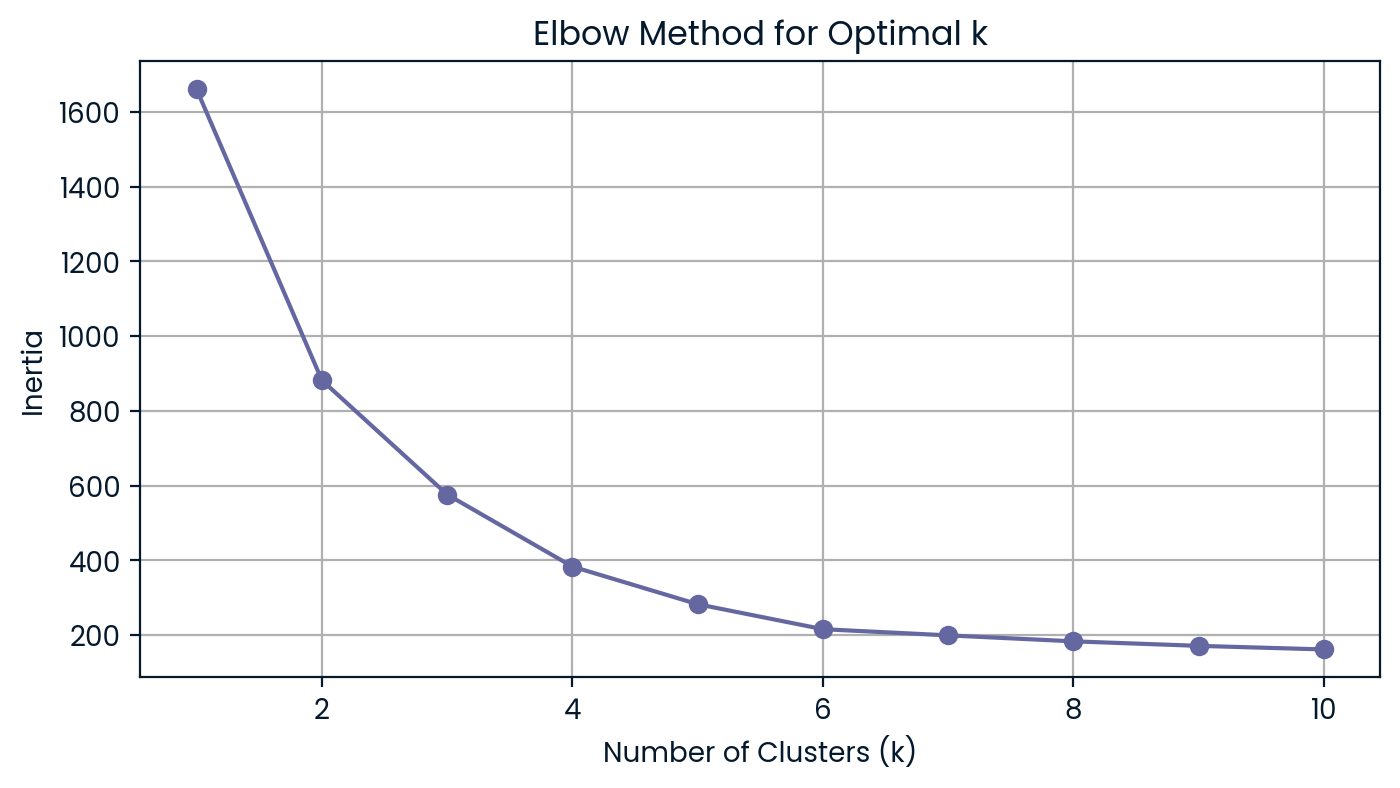

         culmen_length_mm  culmen_depth_mm  ...  body_mass_g  sex_MALE
cluster                                     ...                       
0               43.878302        19.111321  ...  4006.603774       1.0
1               45.563793        14.237931  ...  4679.741379       0.0
2               40.217757        17.611215  ...  3419.158879       0.0
3               49.473770        15.718033  ...  5484.836066       1.0

[4 rows x 5 columns]


In [11]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()
#penguins_df.info()
#penguins_df.isna().sum()

# Create dummy variable for the categorical column sex 
penguins_df = pd.get_dummies(penguins_df, columns = ['sex'], drop_first = True)

# Scale features before clustering
scaler = StandardScaler()
scaled_features = scaler.fit_transform(penguins_df)

# Use Elbow Method to determine the optimal number of cluster 
inertia_values = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(scaled_features)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize = (8, 4))
plt.plot(range(1, 11), inertia_values, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

# Run Kmeans clustering with k = 4
optimal_k = 4
kmeans = KMeans(n_clusters = optimal_k, random_state = 42)
penguins_df['cluster'] = kmeans.fit_predict(scaled_features)

# Create summary statistics per custers for only numeric columns
stat_penguins = penguins_df.drop(columns = ['cluster']).groupby(penguins_df['cluster']).mean()
print(stat_penguins)